# Surface measurements

In this notebook we demonstrate how to retrieve surface/vertex measurements in a table and how to visualize them on the surface. The used example data is a derived from of [AV Luque and JV Veenvliet (2023)](https://zenodo.org/record/7603081#.Y94N4XbMJmN) licensed [CC-BY](https://creativecommons.org/licenses/by/4.0/legalcode). See the [creating_surfaces](creating_surfaces.ipynb) for how to create the surface from raw imaging data.

See also
* [vedo library](https://vedo.embl.es/)
* [vedo add curvature documentation](https://vedo.embl.es/autodocs/content/vedo/mesh.html?highlight=curvature#vedo.mesh.Mesh.addCurvatureScalars)

In [1]:
import napari
import matplotlib.pyplot as plt
from napari.utils import nbscreenshot
import numpy as np
import vedo
from napari_process_points_and_surfaces import add_curvature, Curvature, spherefitted_curvature
import napari_process_points_and_surfaces as nppas

import vedo

In [2]:
viewer = napari.Viewer(ndisplay=3)
viewer.camera.angles = (40, -30, 55)

We will be working with a simple geometry (i.e., an ellipsoid) to demonstrate the curvature property and the different settings.

In [3]:
mesh = vedo.load("gastruloid.ply")
surface = nppas.to_napari_surface_data(mesh)
len(surface[0])

249178

In [4]:
simplified = nppas.decimate_quadric(surface, fraction=0.1)
len(simplified[0])

24939

## Surface visualization
The surface itself does not come with any quantification. It looks like this:

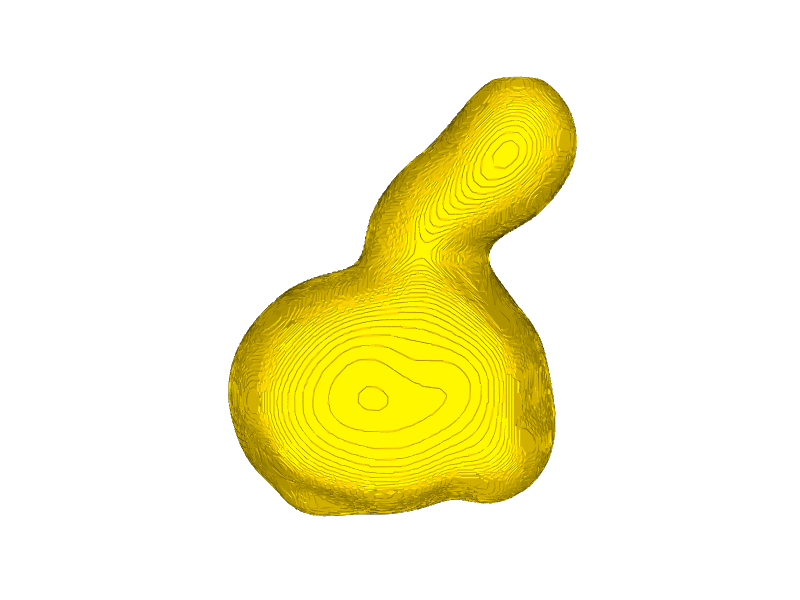

In [5]:
nppas.show(simplified, azimuth=-90)

## Quantification
We can create a table ([pandas Dataframe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)) like this.

In [6]:
requested_measurements = [nppas.Quality.AREA, 
                          nppas.Quality.ASPECT_RATIO,
                          nppas.Quality.GAUSS_CURVATURE, 
                          nppas.Quality.MEAN_CURVATURE]

df = nppas.surface_quality_table(simplified, requested_measurements)
df

,vertex_index,Quality.AREA,Quality.ASPECT_RATIO,Quality.GAUSS_CURVATURE,Quality.MEAN_CURVATURE
0,0,15.546006,3.660011,-0.057681,-0.005836
1,1,4.513324,5.008244,0.394389,0.034059
2,2,4.008099,4.616107,0.453245,0.018617
3,3,5.150098,3.280265,0.088755,-0.002872
4,4,14.078377,4.377918,0.084536,0.001877
...,...,...,...,...,...
24934,24934,1.427140,2.346394,-0.598363,4.062885
24935,24935,2.418810,6.803323,0.141071,1.601717
24936,24936,10.465272,4.206814,-0.221497,-0.003205
24937,24937,3.320127,8.706467,0.088731,0.967390


To get an overview about measurements, we can summarize them:

In [7]:
df.describe()

,vertex_index,Quality.AREA,Quality.ASPECT_RATIO,Quality.GAUSS_CURVATURE,Quality.MEAN_CURVATURE
count,24939.000000,24939.000000,24939.000000,24939.000000,24939.000000
mean,12469.000000,3.463162,2.655554,0.012534,0.018245
std,7199.413518,2.591996,7.348488,0.304132,0.280643
min,0.000000,0.475144,1.083892,-2.193467,-0.203568
25%,6234.500000,2.042755,1.690789,-0.164929,-0.013265
50%,12469.000000,2.674085,2.083980,0.005926,-0.001603
75%,18703.500000,4.041013,2.850319,0.200824,0.011507
max,24938.000000,56.963412,685.289589,3.272449,24.430148


From that table, we can extract a single column as list.

In [8]:
area = list(df['Quality.AREA'])
area[:5]

[15.54600578759073,
 4.513323738575812,
 4.0080994240853,
 5.150098451827806,
 14.078377304646597]

## Visualizing measurements
To visualize the measurements, we need to attach them to the surface:

In [9]:
quantified_surface = nppas.set_vertex_values(simplified, area)

The visualization can be customized as well, e.g. by changing the view angle and the colormap.

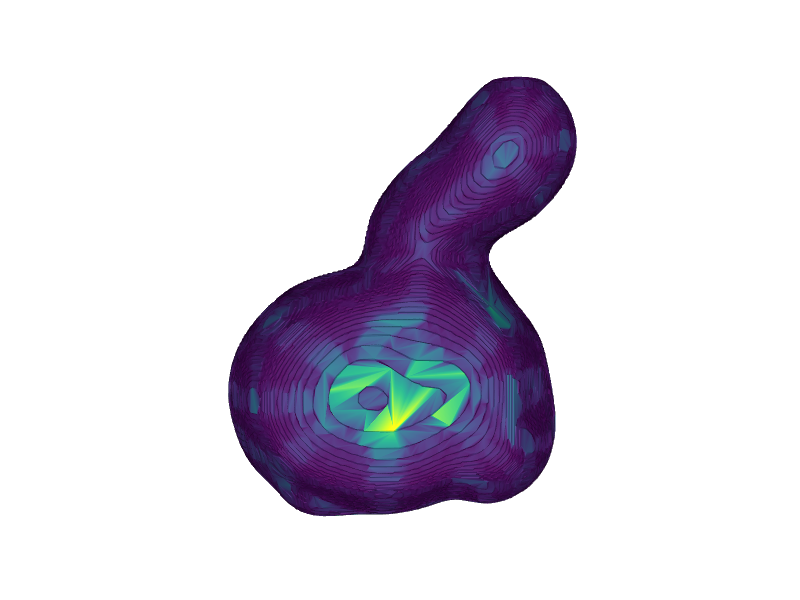

In [10]:
nppas.show(quantified_surface, azimuth=-90)

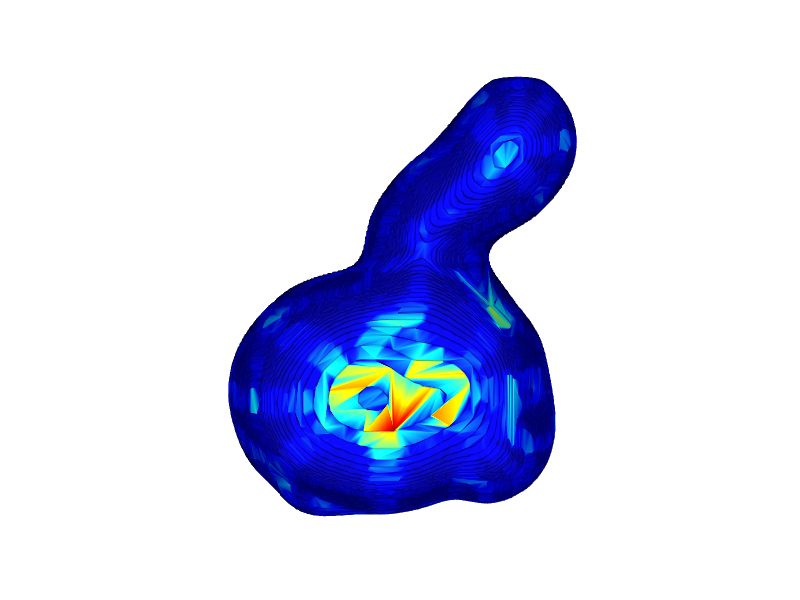

In [11]:
nppas.show(quantified_surface, azimuth=-90, cmap='jet')

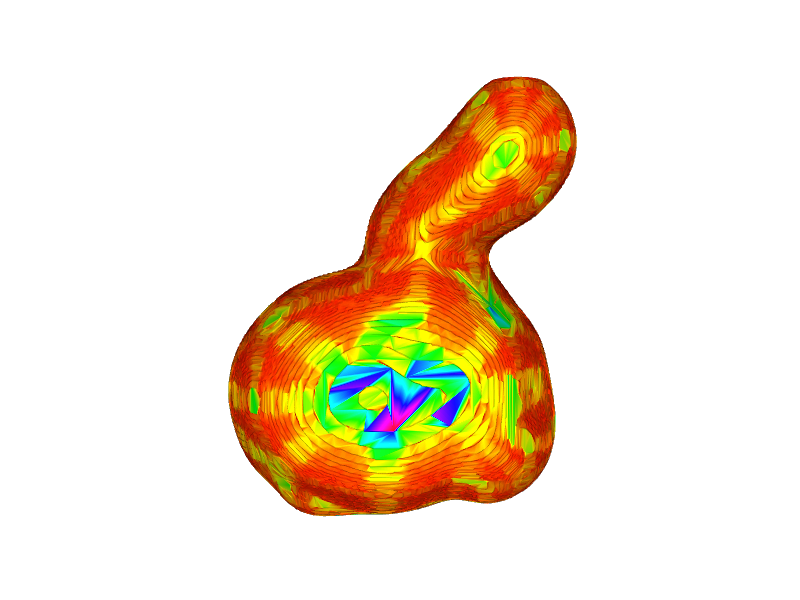

In [12]:
nppas.show(quantified_surface, azimuth=-90, cmap='hsv')